In [1]:
data_type = 'data'
branch = 'm_Kpipi'

In [2]:
import sys
sys.path.insert(0, '..')
from definition import (
    data_names,
    limits_m_Kpipi,
    columns,
    latex_decay
)

MC_name   = data_names['MC']
data_name = data_names[data_type]

low = limits_m_Kpipi[data_type]['low']
high = limits_m_Kpipi[data_type]['high']

print("MC name: ", MC_name)
print("data name: ", data_name)

print("low: ", low)
print("high: ", high)


# used to change the name of the parameters in order to 
# be able to recreate zfit parameters with different names.
num = 0 


MC name:  BTODstDX_MC
data name:  BTODstDX
low:  1800
high:  1950


In [3]:
num = 0

# $B \to D^{*-}\left(D^{+} \to K^+ \pi^+ \pi^+  \right)X$ Background
1. Fit to $m(K^+ \pi^+ \pi^+)$ to isolate the $D^+$ peak in data
2. Computation of the $_s$Weights associated with the $D_s$ peak
3. Isolate the $D^+$ peak in MC with a $\pm 25$ MeV window around the $D^+$ peak 
4. Compare some $_s$Weighted data variables to their MC counterparts. For instance, look at the $q^2$, `isolation_BDT` and the angles.

After that, we might want want to reweight the the MC to match the data with `GBReweighter`

In [4]:
# python libraries
import zfit
import timeit
from numpy import sqrt

from hepstats.splot import compute_sweights

# bd2dsttaunu
from bd2dsttaunu.locations import loc
from bd2dsttaunu.definition import m_Dplus_PDG

# HEA library
from HEA.plot import plot_hist_auto, plot_hist, save_fig
from HEA.plot.fit import plot_hist_fit_auto
import HEA.fit.fit
from HEA import load_dataframe, load_dataframe_YY_MM
from HEA.plot.tools import draw_vline
from HEA.definition import latex_params
from HEA.fit import retrieve_params
from HEA.fit.fit import sum_crystalball_or_gaussian

Welcome to JupyROOT 6.22/06


## Read the dataframe

### Read the head

In [177]:
loc.B2DstDplusX_list[0] + loc.B2DstDplusX_list[6] 

'/data/lhcb/users/scantlebury-smead/angular_analysis/data/data_11_up_final_ds_selection.root/data/lhcb/users/scantlebury-smead/angular_analysis/data/data_11_down_final_ds_selection.root'

In [13]:
for sub_branch in df_head.columns:
    if '_0.' not in sub_branch:
        if 'BBDTDecision' not in sub_branch and '_1.' not in sub_branch and 'MC15TuneV1' not in sub_branch:   
            print(sub_branch)

B0_ENDVERTEX_X
B0_ENDVERTEX_Y
B0_ENDVERTEX_Z
B0_ENDVERTEX_XERR
B0_ENDVERTEX_YERR
B0_ENDVERTEX_ZERR
B0_ENDVERTEX_CHI2
B0_ENDVERTEX_NDOF
B0_OWNPV_X
B0_OWNPV_Y
B0_OWNPV_Z
B0_OWNPV_XERR
B0_OWNPV_YERR
B0_OWNPV_ZERR
B0_OWNPV_CHI2
B0_OWNPV_NDOF
B0_IP_OWNPV
B0_IPCHI2_OWNPV
B0_FD_OWNPV
B0_FDCHI2_OWNPV
B0_DIRA_OWNPV
B0_P
B0_PT
B0_PE
B0_PX
B0_PY
B0_PZ
B0_MM
B0_MMERR
B0_M
B0_ID
B0_ETA
B0_DstconstD0const_D0_LV01
B0_DstconstD0const_D0_LV02
B0_DstconstD0const_D0_M
B0_DstconstD0const_D0_MERR
B0_DstconstD0const_D0_P
B0_DstconstD0const_D0_PT
B0_DstconstD0const_D0_PX
B0_DstconstD0const_D0_PY
B0_DstconstD0const_D0_PZ
B0_DstconstD0const_D0_VX
B0_DstconstD0const_D0_VXERR
B0_DstconstD0const_D0_VY
B0_DstconstD0const_D0_VYERR
B0_DstconstD0const_D0_VZ
B0_DstconstD0const_D0_VZERR
B0_DstconstD0const_Dst_LV01
B0_DstconstD0const_Dst_LV02
B0_DstconstD0const_Dst_M
B0_DstconstD0const_Dst_MERR
B0_DstconstD0const_Dst_P
B0_DstconstD0const_Dst_PT
B0_DstconstD0const_Dst_PX
B0_DstconstD0const_Dst_PY
B0_DstconstD0const_Dst_P

D0_pion_MC12TuneV3_ProbNNghost
D0_pion_MC12TuneV4_ProbNNe
D0_pion_MC12TuneV4_ProbNNmu
D0_pion_MC12TuneV4_ProbNNpi
D0_pion_MC12TuneV4_ProbNNk
D0_pion_MC12TuneV4_ProbNNp
D0_pion_MC12TuneV4_ProbNNghost
D0_pion_OWNPV_X
D0_pion_OWNPV_Y
D0_pion_OWNPV_Z
D0_pion_OWNPV_XERR
D0_pion_OWNPV_YERR
D0_pion_OWNPV_ZERR
D0_pion_OWNPV_CHI2
D0_pion_OWNPV_NDOF
D0_pion_IP_OWNPV
D0_pion_IPCHI2_OWNPV
D0_pion_ORIVX_X
D0_pion_ORIVX_Y
D0_pion_ORIVX_Z
D0_pion_ORIVX_XERR
D0_pion_ORIVX_YERR
D0_pion_ORIVX_ZERR
D0_pion_ORIVX_CHI2
D0_pion_ORIVX_NDOF
D0_pion_Nb_NIsoTr
D0_pion_IsoSumBDT
D0_pion_ConeIso
D0_pion_NIsoTr_BestSum_MINIPCHI2
D0_pion_NIsoTr_BestSum_PVDIS
D0_pion_NIsoTr_BestSum_SVDIS
D0_pion_NIsoTr_BestSum_DOCA
D0_pion_NIsoTr_BestSum_ANGLE
D0_pion_NIsoTr_BestSum_FC
D0_pion_P
D0_pion_PT
D0_pion_PE
D0_pion_PX
D0_pion_PY
D0_pion_PZ
D0_pion_M
D0_pion_ID
D0_pion_PIDe
D0_pion_PIDmu
D0_pion_PIDK
D0_pion_PIDp
D0_pion_PIDd
D0_pion_ProbNNe
D0_pion_ProbNNk
D0_pion_ProbNNp
D0_pion_ProbNNpi
D0_pion_ProbNNmu
D0_pion_ProbNNd
D

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [172]:
mask = df_head['costheta_L_reco'].isnull().values

print("NaN values coincide with NaN values of costheta_L_true")

for sub_branch in df_head.columns:
    if '_0.' not in sub_branch:
        if 'BBDTDecision' not in sub_branch and '_1.' not in sub_branch and 'MC15TuneV1' not in sub_branch:   
            if df_head[sub_branch].isnull().values.any():
                if df_head[sub_branch][mask].isnull().values.all():
                    print(sub_branch)
                    
print("")
print("NaN values DO NOT coincide with NaN values of costheta_L_true")

for sub_branch in df_head.columns:
    if '_0.' not in sub_branch:
        if 'BBDTDecision' not in sub_branch and '_1.' not in sub_branch and 'MC15TuneV1' not in sub_branch:   
            if df_head[sub_branch].isnull().values.any():
                if not df_head[sub_branch][mask].isnull().values.all():
                    print(sub_branch)


NaN values coincide with NaN values of costheta_L_true
theta_L_reco
costheta_L_reco

NaN values DO NOT coincide with NaN values of costheta_L_true
B0_DstconstD0const_D0_MERR
B0_DstconstD0const_Dst_MERR
B0_DstconstD0const_MERR
B0_DstconstD0const_Tau_MERR


In [155]:
df_MC_head = load_dataframe(loc.B2DstDplusX_MC, tree_name='DecayTreeTuple/DecayTree')

Loading /data/lhcb/users/scantlebury-smead/angular_analysis/double_charm/final_ds_selection_B_DstDpX_Kpipi_truth_matched.root


In [160]:
mask = df_MC_head['costheta_L_reco'].isnull().values

In [163]:
df_MC_head[sub_branch][~mask].isnull().values.any()

False

In [169]:
print("NaN values coincide with NaN values of costheta_L_true")

for sub_branch in df_MC_head.columns:
    if '_0.' not in sub_branch:
        if 'BBDTDecision' not in sub_branch and '_1.' not in sub_branch and 'MC15TuneV1' not in sub_branch:   
            if df_MC_head[sub_branch].isnull().values.any():
                if df_MC_head[sub_branch][mask].isnull().values.all():
                    print(sub_branch)
                    print(df_MC_head[sub_branch][mask].isnull().values.all())
                    
print("")
print("NaN values DO NOT coincide with NaN values of costheta_L_true")

for sub_branch in df_MC_head.columns:
    if '_0.' not in sub_branch:
        if 'BBDTDecision' not in sub_branch and '_1.' not in sub_branch and 'MC15TuneV1' not in sub_branch:   
            if df_MC_head[sub_branch].isnull().values.any():
                if not df_MC_head[sub_branch][mask].isnull().values.all():
                    print(sub_branch)
                    print(df_MC_head[sub_branch][mask].isnull().values.all())

NaN values coincide with NaN values of costheta_L_true
theta_L_reco
True
costheta_L_reco
True
costheta_L_res
True
theta_L_res
True

NaN values DO NOT coincide with NaN values of costheta_L_true
theta_L_true
False
costheta_L_true
False
theta_X_true
False
costheta_X_true
False
chi_true
False
coschi_true
False
m2_miss_true
False
tau_life_true
False
costheta_X_res
False
theta_X_res
False
coschi_res
False
chi_res
False
m2_miss_res
False
tau_life_res
False


In [ ]:
for sub_branch in df_MC_head.columns:
    if '_0.' not in sub_branch:
        if 'BBDTDecision' not in sub_branch and '_1.' not in sub_branch and 'MC15TuneV1' not in sub_branch:   
            if df_MC_head[sub_branch][].isnull().values.any():
                print(sub_branch)

In [100]:
import numpy as np

In [142]:
# columns = ['costheta_L_reco','tau_P', 'B0_M',
#            'tau_PX', 'tau_PY', 'tau_PZ', 'tau_M',
#            'm_DstKpipi', 'm_Kpipi',
#            'B0_PX_reco', 'B0_PY_reco', 'B0_PZ_reco',
#            'B0_nu_PX_reco', 'B0_nu_PY_reco', 'B0_nu_PZ_reco',
#            'tau_angle_max', 'tau_P_reco', 'cos']

columns = [
    'costheta_L_reco',
    'tau_PX_reco', 'tau_PY_reco', 'tau_PZ_reco', 'tau_E_reco',
    'B0_PX_reco', 'B0_PY_reco', 'B0_PZ_reco', 'B0_E_reco',
    'Dst_PX', 'Dst_PY', 'Dst_PZ', 'Dst_PE',
]

In [143]:
df = {}

df['data'] = load_dataframe(loc.B2DstDplusX_list, 
                    tree_name='DecayTreeTuple/DecayTree', 
                    columns=columns)
df['MC'] = load_dataframe(loc.B2DstDplusX_MC, 
                    tree_name='DecayTreeTuple/DecayTree', 
                    columns=columns+['costheta_L_true'])

Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_11_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_12_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_15_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_16_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_17_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_18_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_11_down_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_12_down_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_15_down_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_16_down_final_ds_selecti

In [144]:
# df['MC'] = df['MC'].query(f'm_Kpipi > 1820 and m_Kpipi < 1950')

In [148]:
for data_type in df.keys():
    print(data_type)
    for column in df[data_type].columns:
        there_is_NaN = df[data_type][column].isnull().values.any()
        if there_is_NaN:
            print(column)
            print(there_is_NaN)
            print("")

data
costheta_L_reco
True

MC
costheta_L_reco
True

costheta_L_true
True



In [150]:
print(df['MC']['costheta_L_reco'].isnull().sum())
print(df['MC']['costheta_L_true'].isnull().sum())

160
1297


In [135]:
np.where(df['MC']['costheta_L_reco'].isnull())

(array([  58,  719,  740,  760,  909,  928,  980, 1059, 1220, 1247, 1482,
        1496, 1560, 1947, 2798, 3024, 3363, 3794, 4132, 4611, 4761, 4842,
        4852, 4964, 5351, 5353, 5394, 5819, 5952, 6059, 6359, 6394, 6482,
        6515, 6609, 6622, 6712, 8101]),)

In [136]:
np.where(df['MC']['costheta_L_true'].isnull())

(array([   8,   26,   31,   86,   93,  109,  119,  138,  151,  163,  167,
         172,  177,  196,  200,  229,  264,  283,  298,  301,  311,  312,
         334,  338,  346,  355,  393,  437,  440,  445,  460,  470,  480,
         495,  513,  521,  532,  534,  554,  555,  560,  562,  589,  600,
         614,  616,  620,  633,  681,  696,  740,  753,  754,  760,  776,
         789,  795,  804,  818,  819,  820,  823,  825,  828,  831,  837,
         840,  848,  864,  866,  869,  877,  895,  896,  901,  908,  950,
         986,  994, 1011, 1031, 1042, 1050, 1058, 1059, 1077, 1084, 1096,
        1104, 1107, 1108, 1148, 1172, 1176, 1179, 1182, 1202, 1204, 1207,
        1220, 1224, 1229, 1232, 1243, 1257, 1264, 1265, 1302, 1316, 1318,
        1324, 1325, 1326, 1331, 1339, 1342, 1350, 1361, 1366, 1383, 1432,
        1440, 1443, 1463, 1472, 1477, 1482, 1493, 1496, 1497, 1518, 1525,
        1526, 1528, 1541, 1545, 1551, 1560, 1561, 1565, 1568, 1598, 1621,
        1622, 1636, 1655, 1671, 1677, 

In [105]:
max(np.array(mask))

True

In [151]:
mask = {}
mask['MC'] = df['MC']['costheta_L_reco'].isnull().values
mask['data'] = df['data']['costheta_L_reco'].isnull().values

In [152]:
NaN = {}
noNaN = {}
full = {}

for data_type in df.keys():
    NaN[data_type] = {}
    noNaN[data_type] = {}
    full[data_type] = {}

for data_type, data in df.items():    
    for column in data.columns:
        NaN[data_type][column] = data[column][mask[data_type]]
        noNaN[data_type][column] = data[column][~mask[data_type]]
        full[data_type][column] = data[column]

/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
//home/correiaa/bd2dsttaunu/HEA/HEA/tools/dist.py:250: RuntimeWarning: invalid value encountered in true_divide
  counts = counts / (n_candidates * bin_width)
//home/correiaa/bd2dsttaunu/HEA/HEA/tools/dist.py:251: RuntimeWarning: invalid value encountered in true_divide
  err   = err / (n_candidates * bin_width) if err is not None else None


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/costheta_L_reco_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/tau_PX_reco_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/tau_PY_reco_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/tau_PZ_reco_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/tau_E_reco_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/B0_PX_reco_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/B0_PY_reco_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/B0_PZ_reco_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/B0_E_reco_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/Dst_PX_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//

/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
//home/correiaa/bd2dsttaunu/HEA/HEA/tools/dist.py:250: RuntimeWarning: invalid value encountered in true_divide
  counts = counts / (n_candidates * bin_width)
//home/correiaa/bd2dsttaunu/HEA/HEA/tools/dist.py:251: RuntimeWarning: invalid value encountered in true_divide
  err   = err / (n_candidates * bin_width) if err is not None else None


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/costheta_L_reco_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/tau_PX_reco_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/tau_PY_reco_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/tau_PZ_reco_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/tau_E_reco_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/B0_PX_reco_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/B0_PY_reco_NaN_MC_no_NaN_MC


//home/correiaa/bd2dsttaunu/HEA/HEA/plot/histogram.py:334: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8, 6))


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/B0_PZ_reco_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/B0_E_reco_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/Dst_PX_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/Dst_PY_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/Dst_PZ_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/Dst_PE_NaN_MC_no_NaN_MC


/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//test/costheta_L_true_NaN_MC_no_NaN_MC


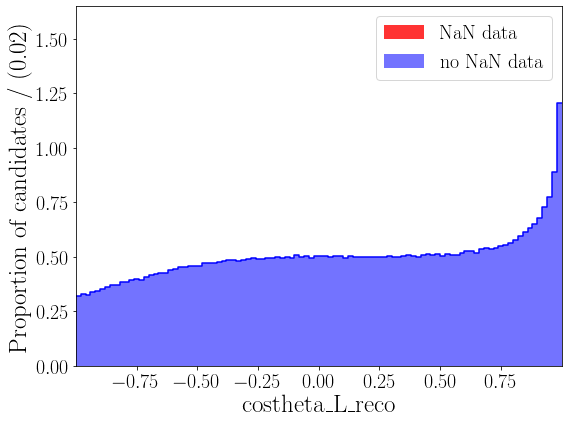

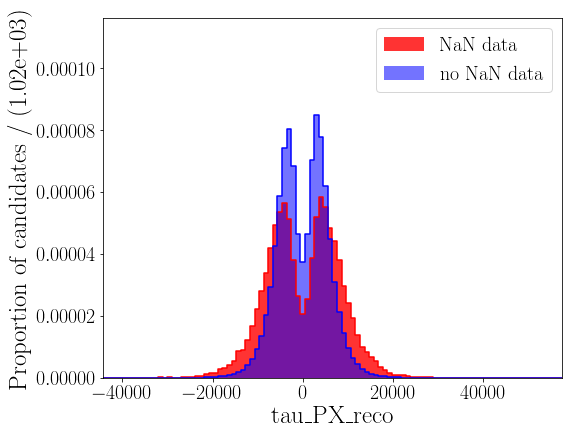

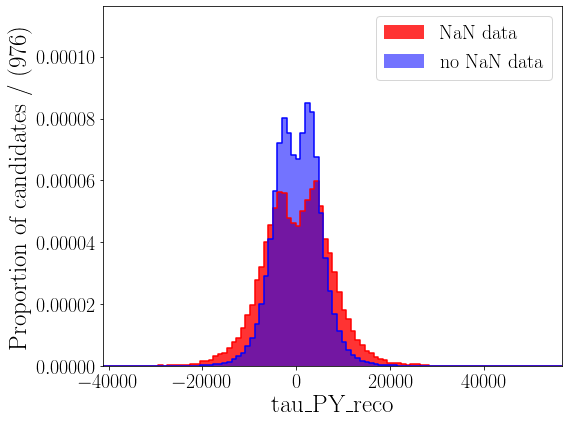

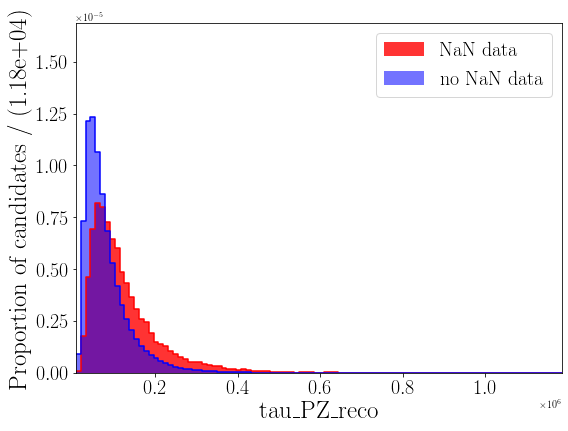

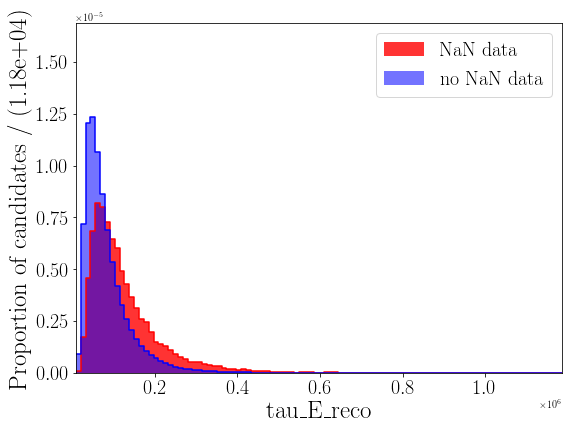

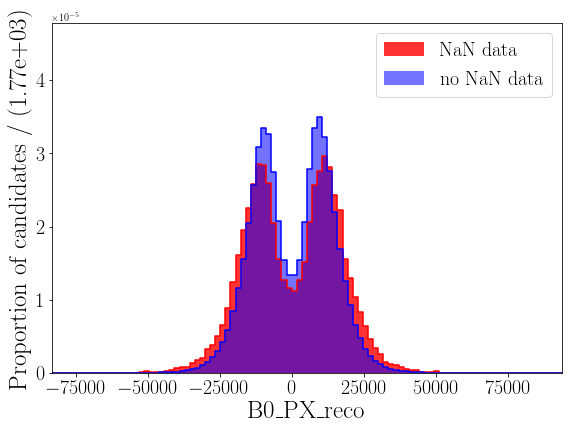

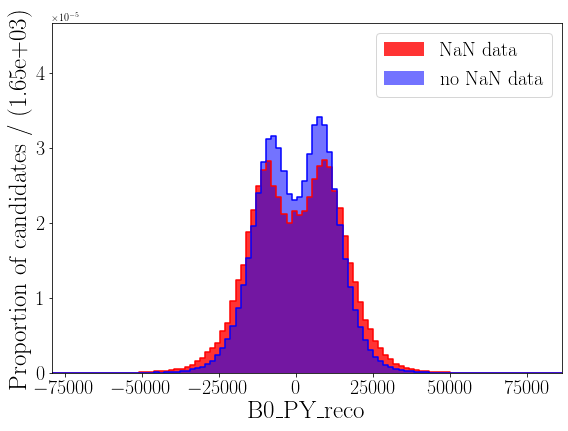

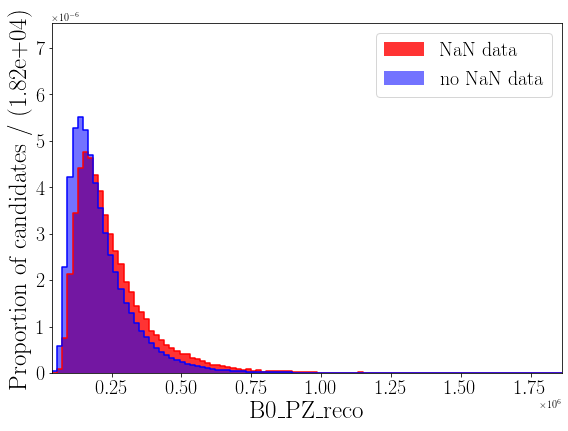

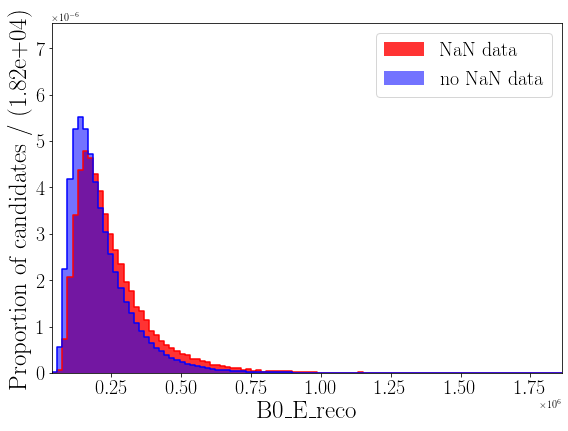

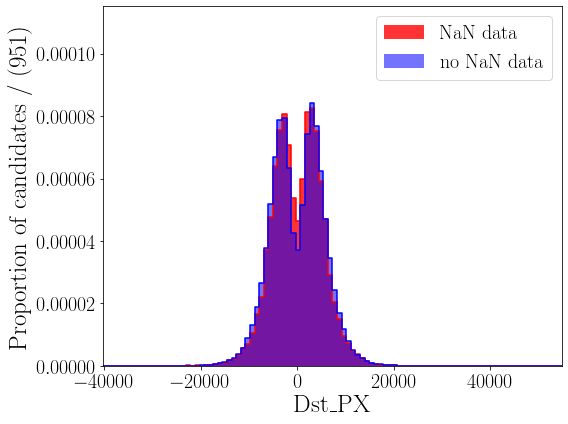

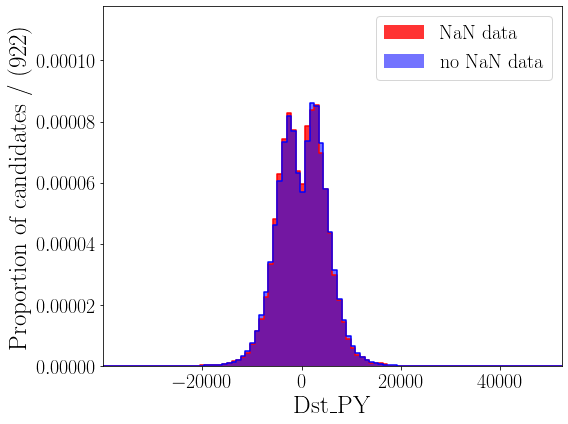

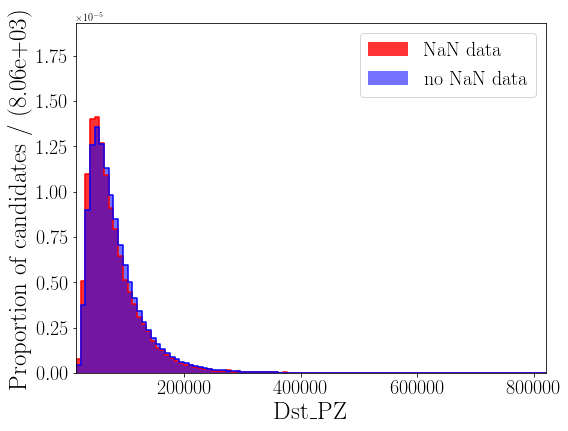

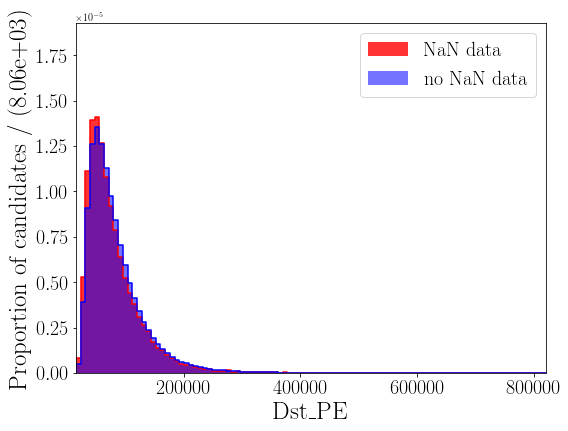

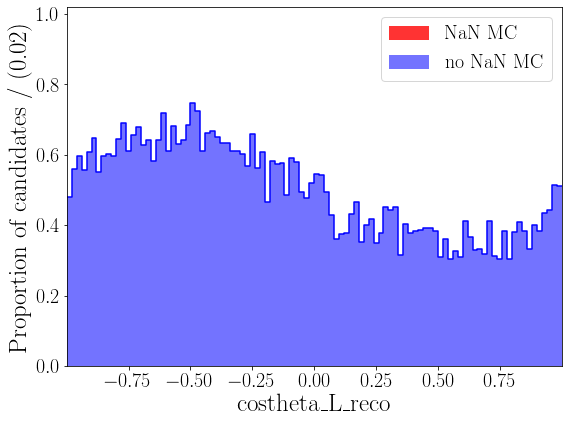

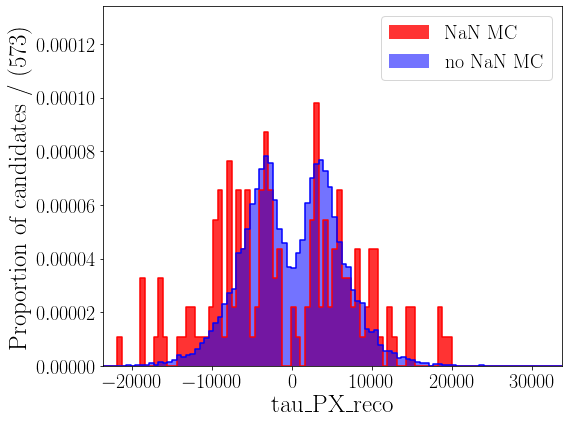

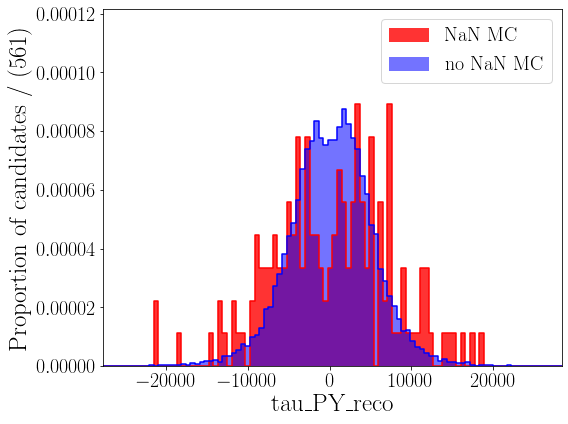

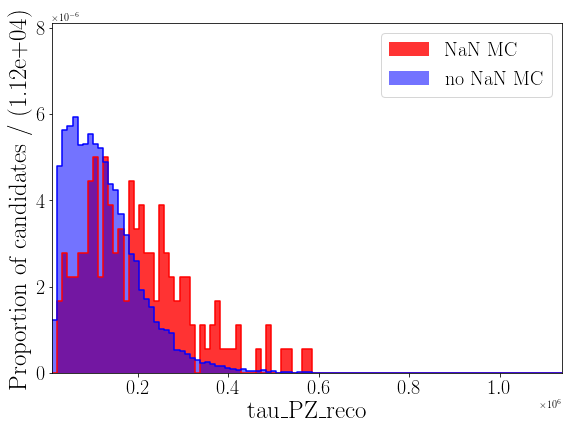

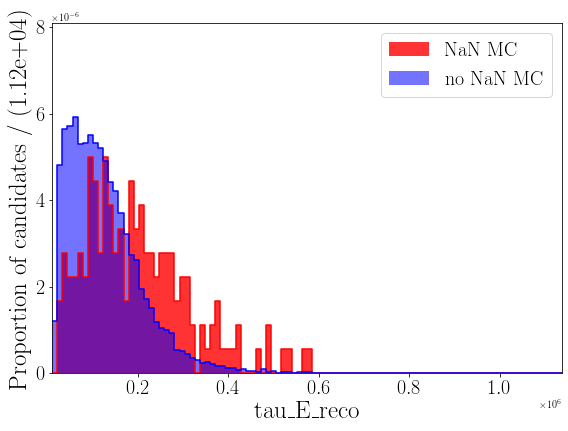

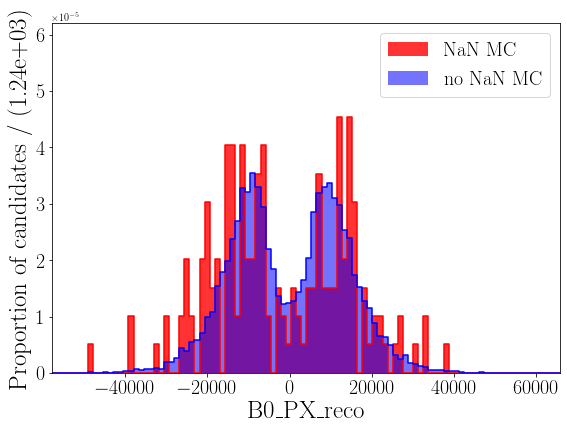

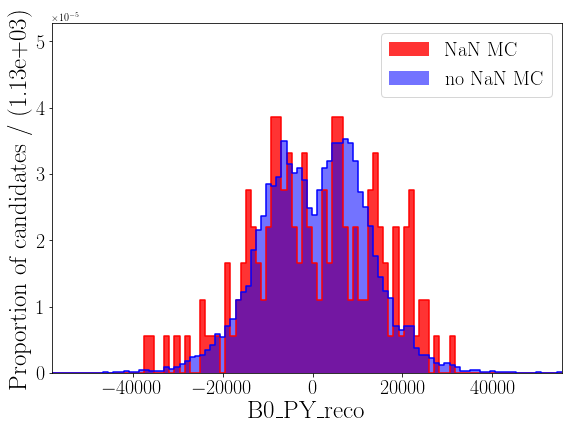

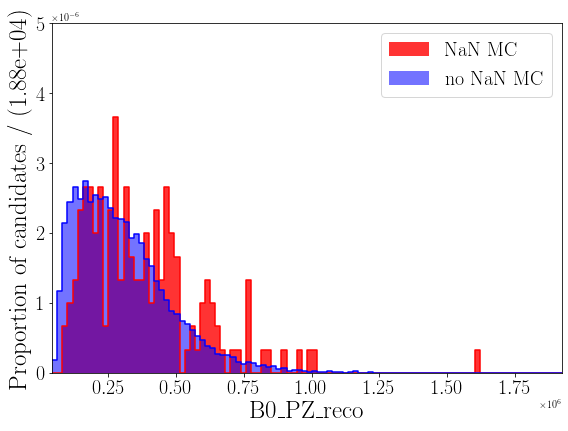

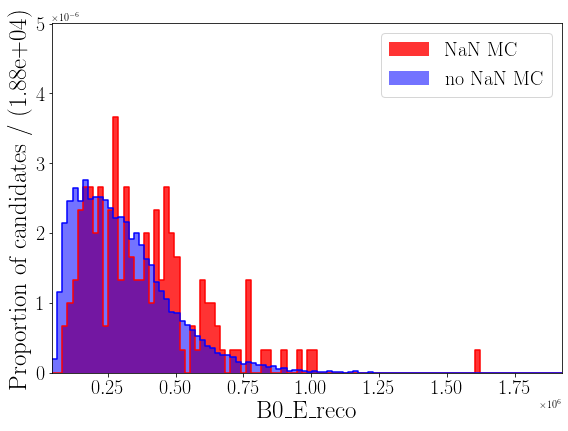

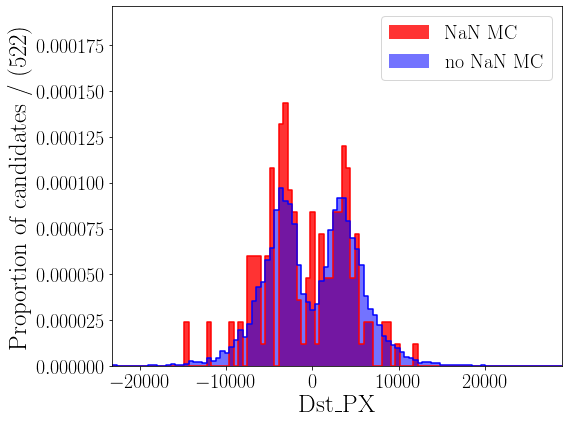

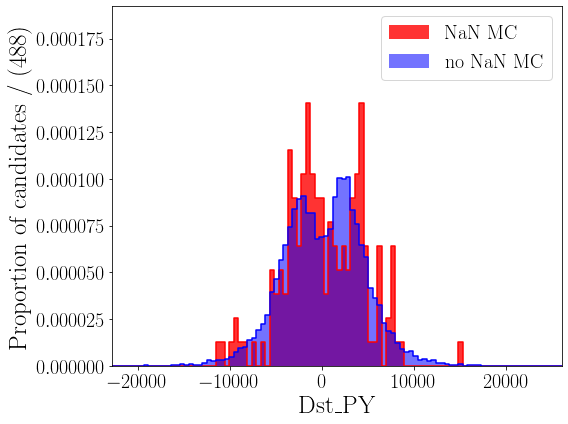

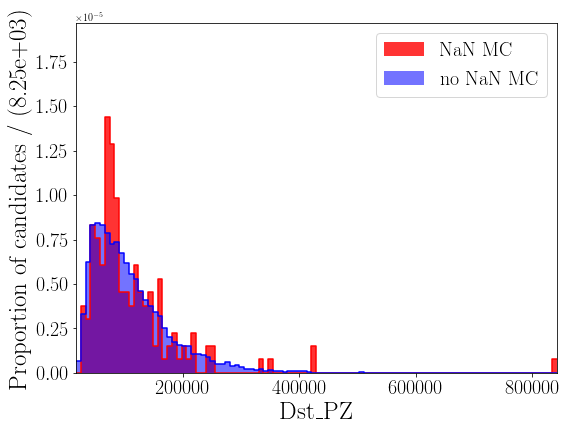

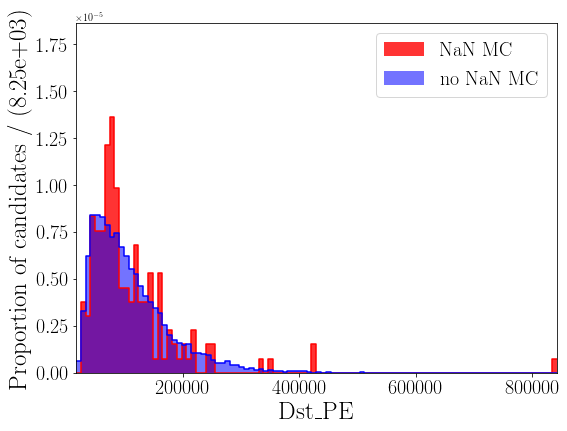

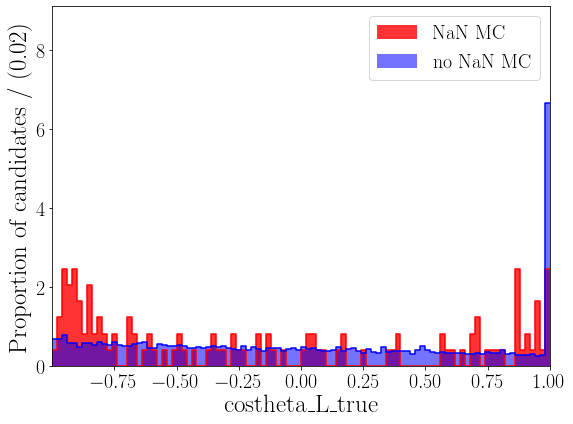

In [154]:
for data_type in df.keys():
    for c in df[data_type].columns:
        plot_hist_var([NaN[data_type][c], noNaN[data_type][c]], 
                      c, 
                      data_names=['NaN ' + data_type, 'no NaN ' + data_type],
                     bar_mode=True, alpha=[0.8, 0.55, 0.40], folder_name='test')

In [107]:
from HEA.plot.histogram import plot_hist_var

/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
//home/correiaa/bd2dsttaunu/HEA/HEA/tools/dist.py:250: RuntimeWarning: invalid value encountered in true_divide
  counts = counts / (n_candidates * bin_width)
//home/correiaa/bd2dsttaunu/HEA/HEA/tools/dist.py:251: RuntimeWarning: invalid value encountered in true_divide
  err   = err / (n_candidates * bin_width) if err is not None else None


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//costheta_L_reco_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//tau_P_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_M_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//tau_PX_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//tau_PY_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//tau_PZ_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//tau_M_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//m_DstKpipi_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//m_Kpipi_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_PX_reco_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_PY_reco_NaN_data_no_NaN_data
Figure saved in /home/correiaa/bd2dsttaunu/outp

/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
//home/correiaa/bd2dsttaunu/HEA/HEA/tools/dist.py:250: RuntimeWarning: invalid value encountered in true_divide
  counts = counts / (n_candidates * bin_width)
//home/correiaa/bd2dsttaunu/HEA/HEA/tools/dist.py:251: RuntimeWarning: invalid value encountered in true_divide
  err   = err / (n_candidates * bin_width) if err is not None else None


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//costheta_L_reco_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//tau_P_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_M_NaN_MC_no_NaN_MC


//home/correiaa/bd2dsttaunu/HEA/HEA/plot/histogram.py:334: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8, 6))


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//tau_PX_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//tau_PY_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//tau_PZ_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//tau_M_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//m_DstKpipi_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//m_Kpipi_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_PX_reco_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_PY_reco_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_PZ_reco_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_nu_PX_reco_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_nu_PY_reco_NaN_MC_no_NaN_MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_nu_PZ_reco_NaN_MC_n

/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/correiaa/miniconda/envs/bd2dsttaunu_env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//costheta_L_true_NaN_MC_no_NaN_MC


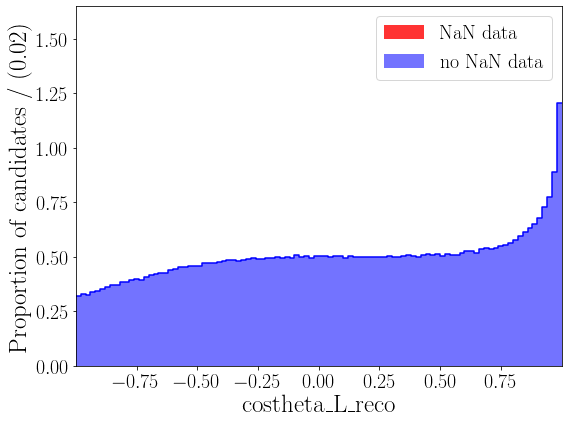

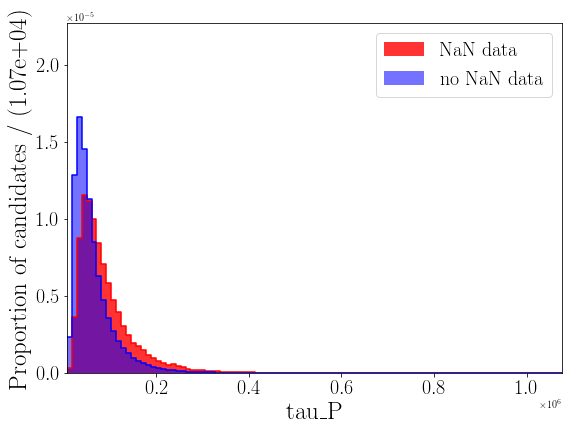

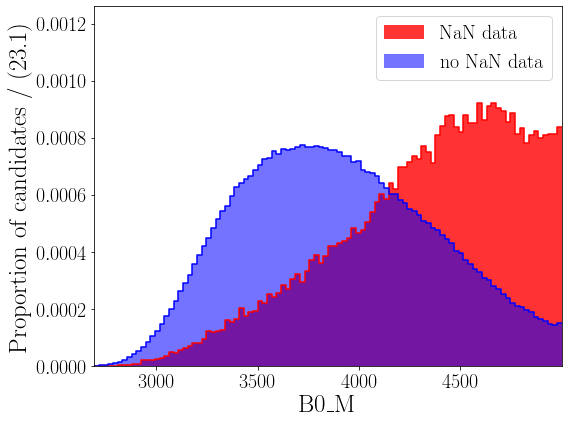

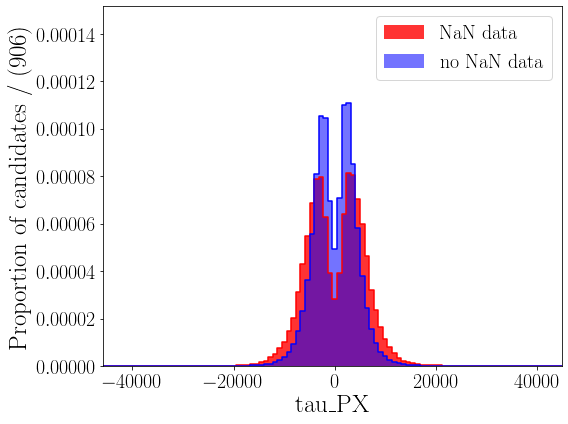

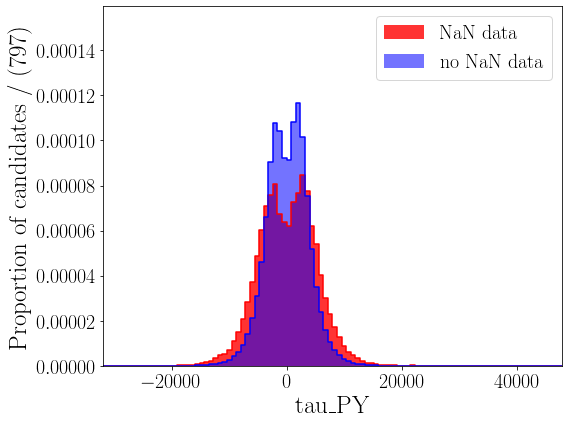

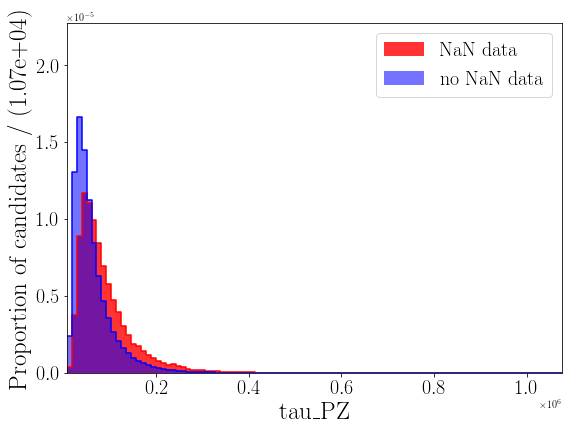

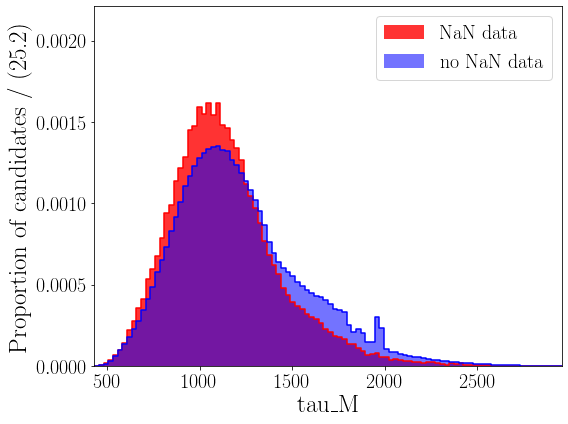

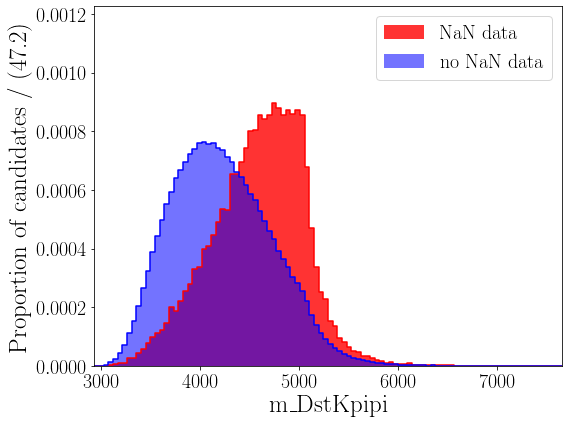

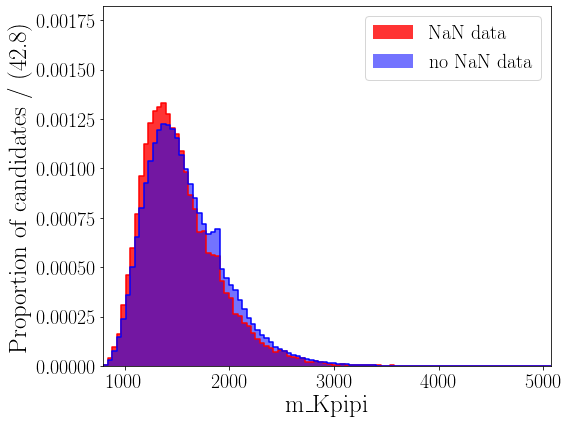

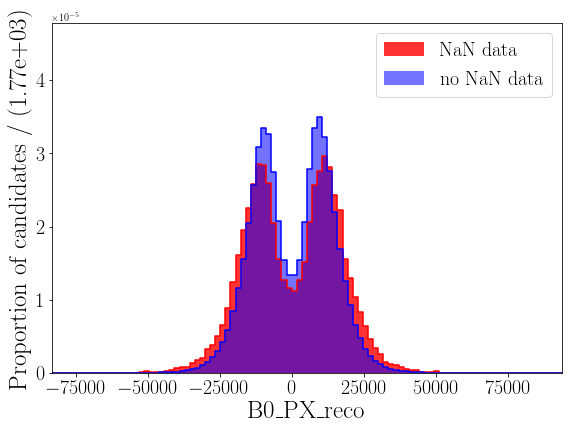

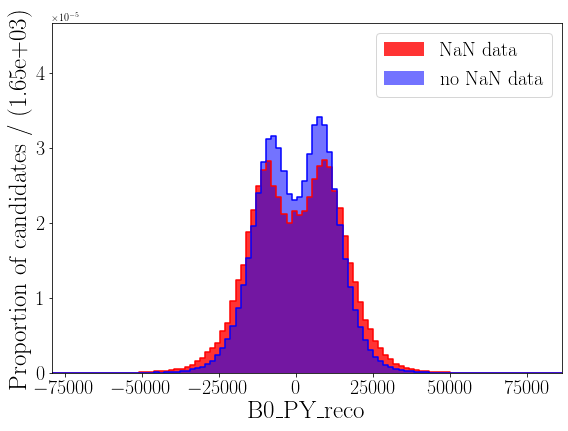

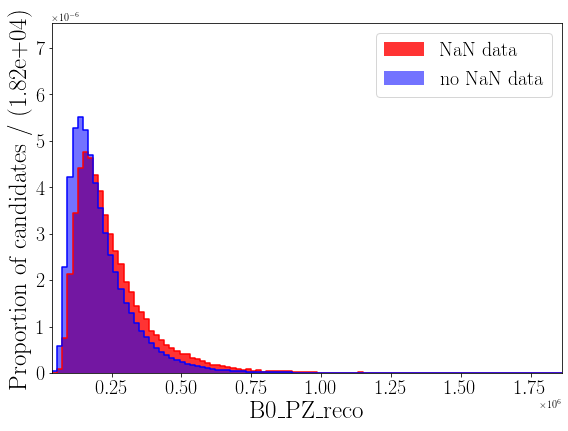

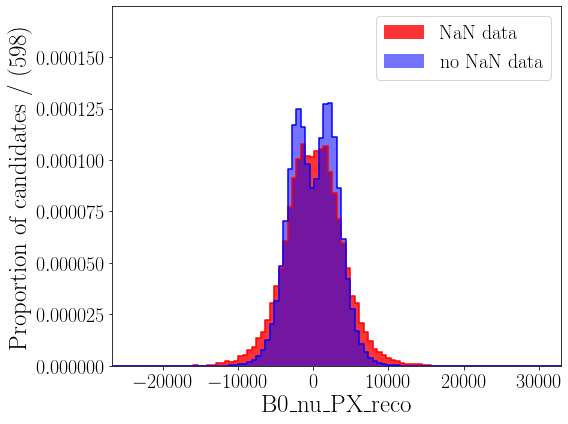

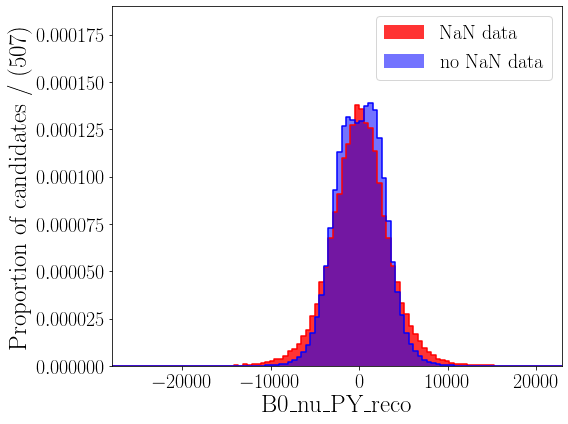

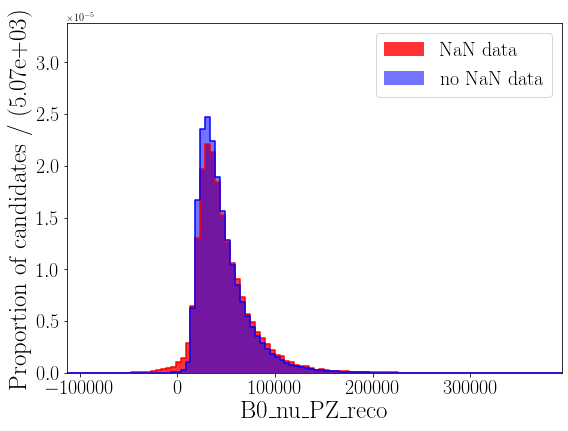

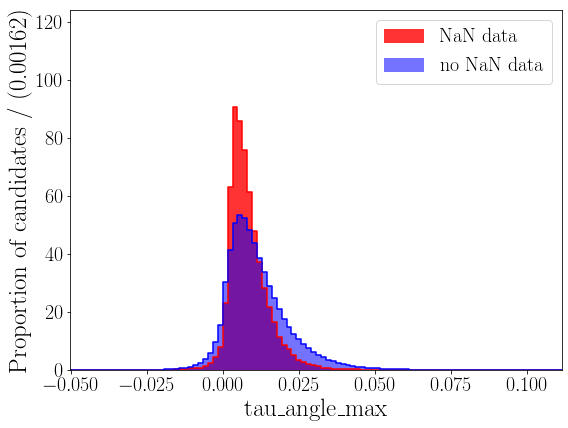

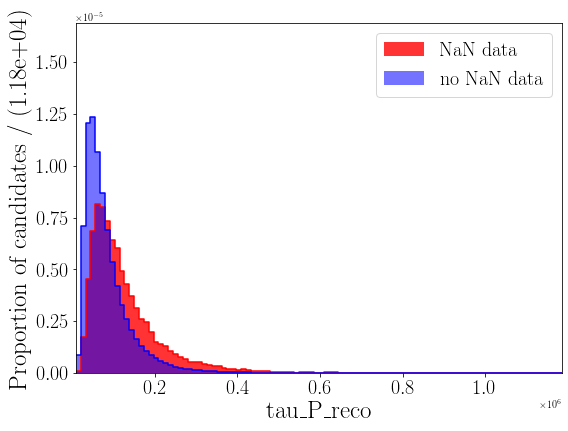

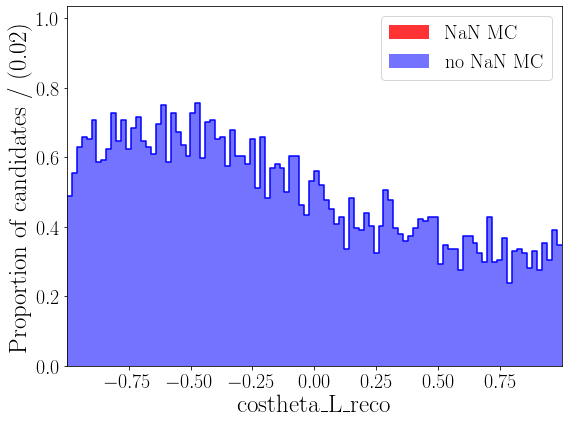

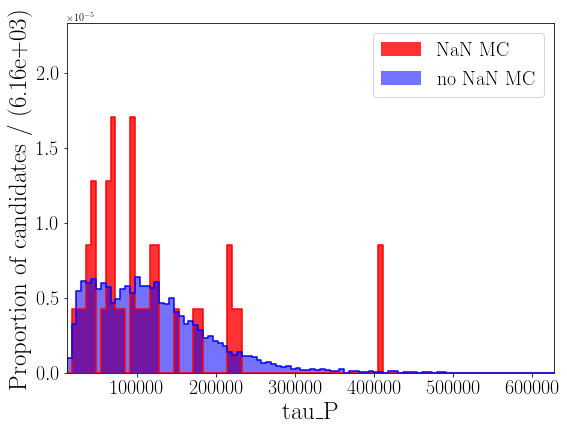

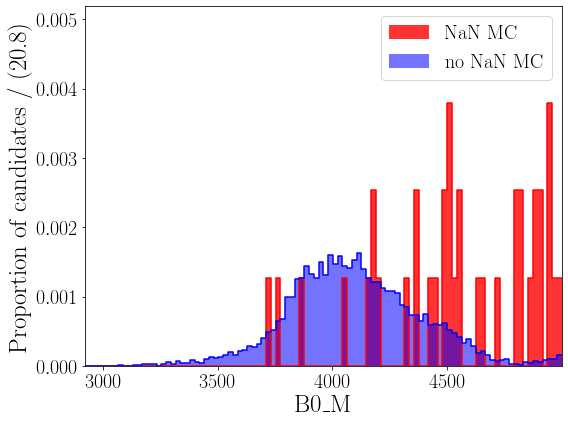

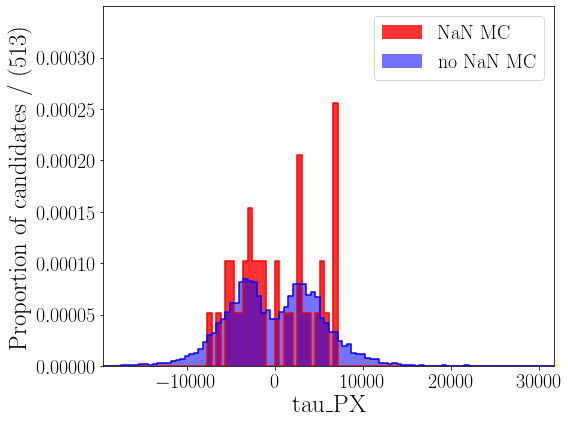

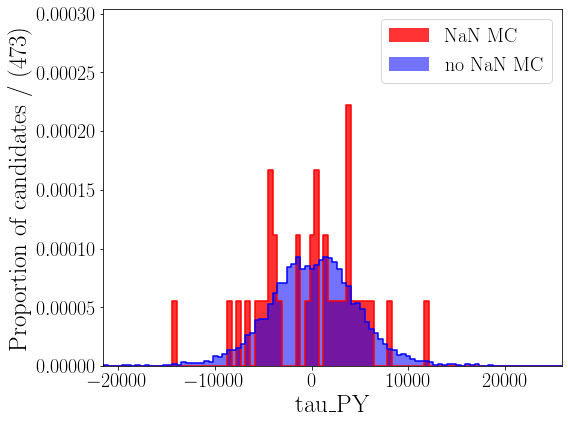

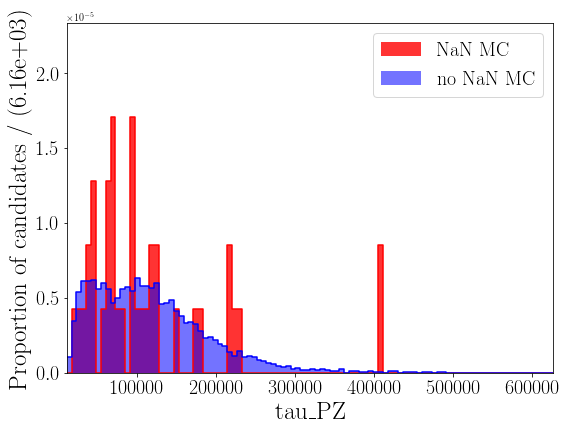

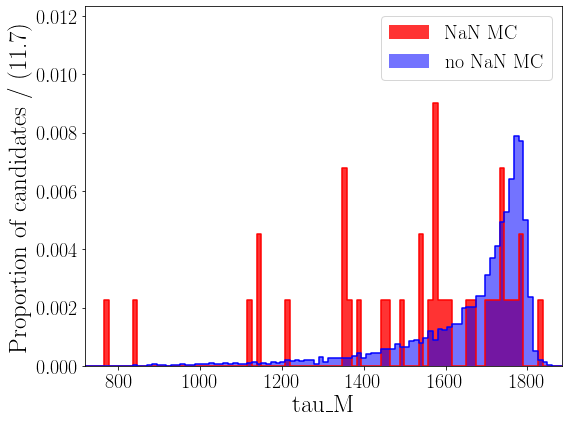

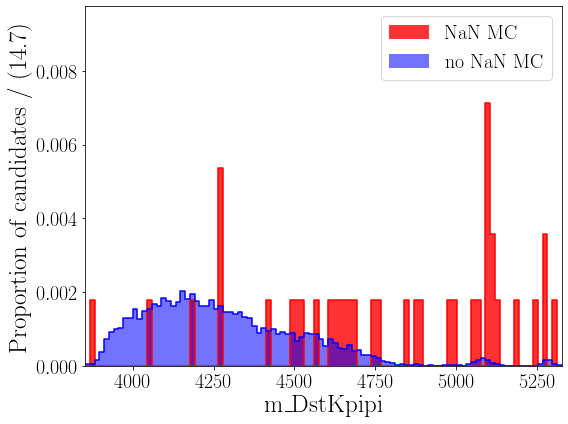

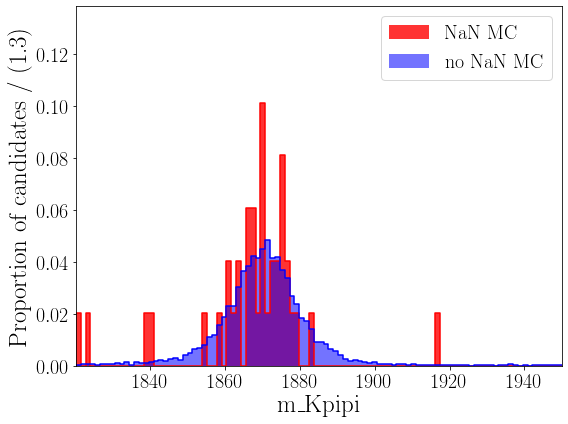

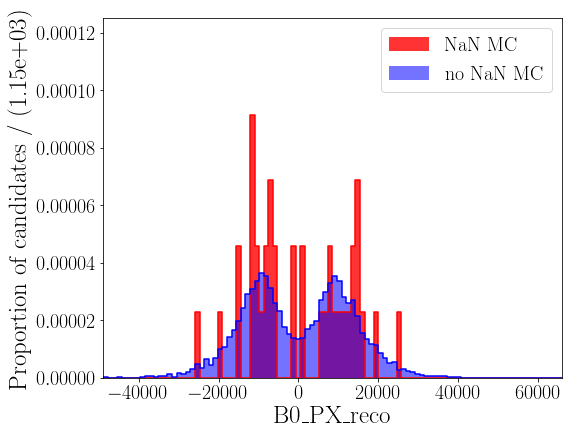

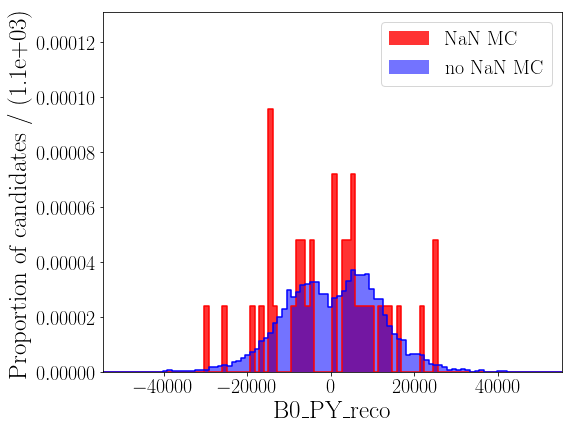

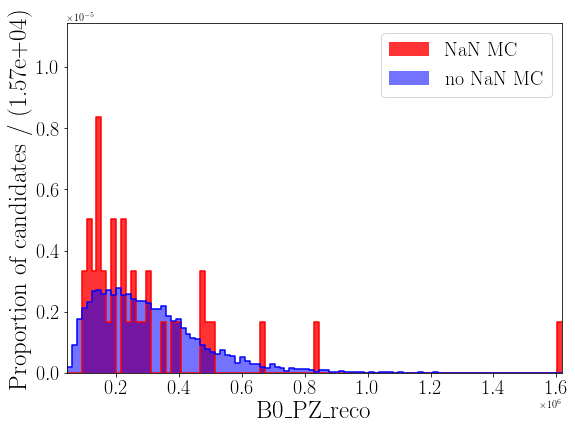

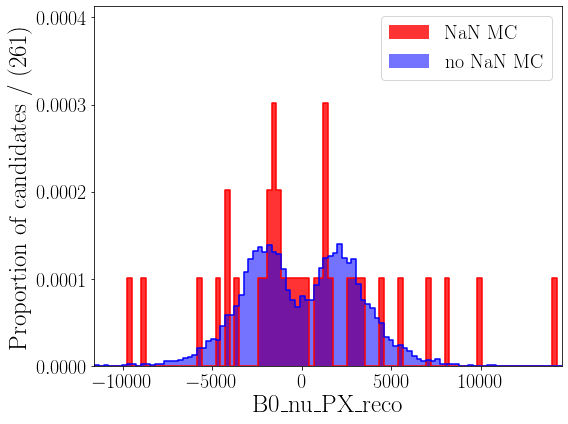

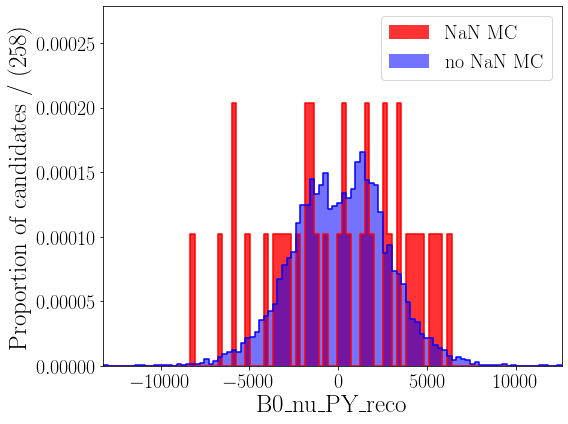

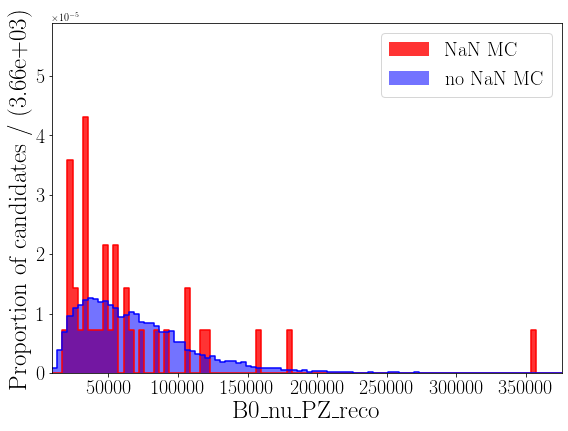

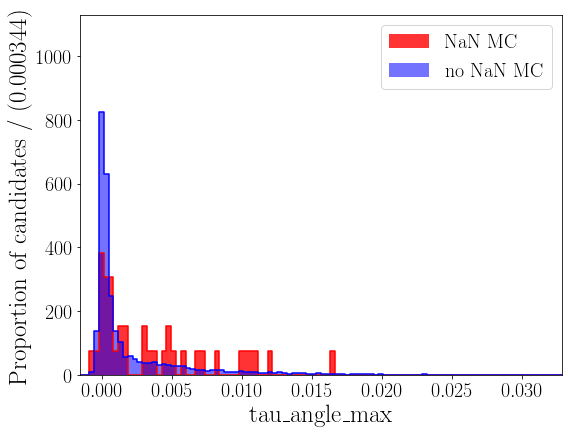

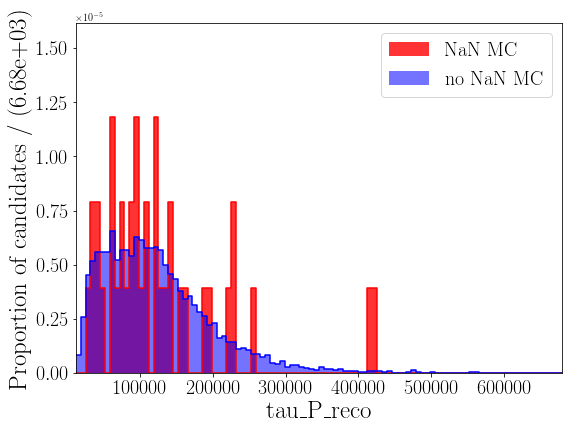

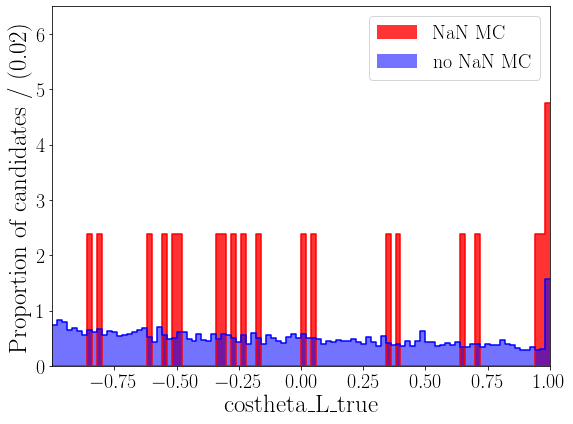

In [141]:
c = 'tau_angle_max'

for data_type in df.keys():
    for c in df[data_type].columns:
        plot_hist_var([NaN[data_type][c], noNaN[data_type][c]], 
                      c, 
                      data_names=['NaN ' + data_type, 'no NaN ' + data_type],
                     bar_mode=True, alpha=[0.8, 0.55, 0.40])

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_nu_PX_reco_NaN_no_NaN
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_nu_PY_reco_NaN_no_NaN
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_nu_PZ_reco_NaN_no_NaN


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='B0\\_nu\\_PZ\\_reco', ylabel='Proportion of candidates / (5.07e+03)'>)

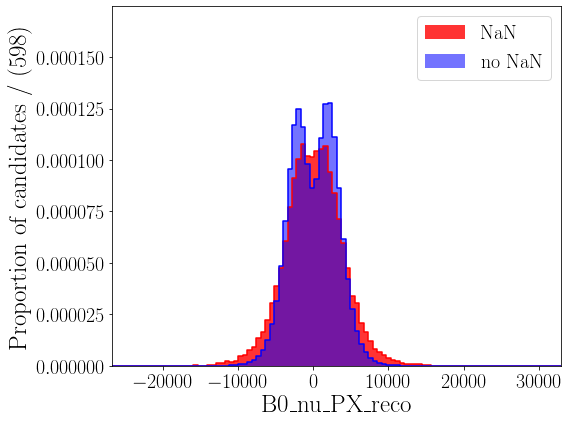

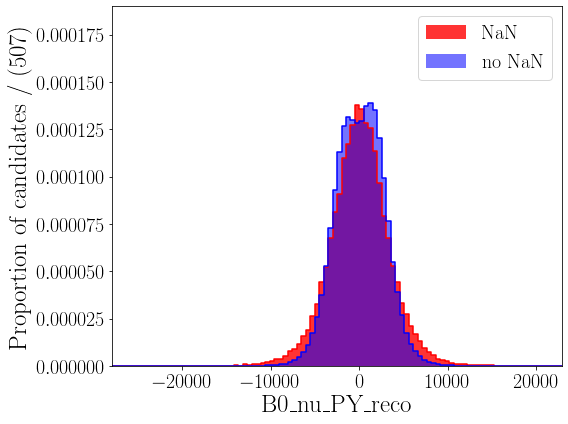

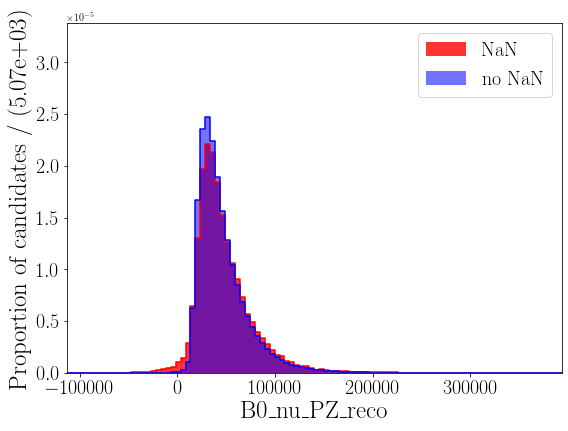

In [109]:
c = 'B0_nu_PX_reco'

plot_hist_var([NaN[c], noNaN[c]], c, data_names=['NaN', 'no NaN'],
             bar_mode=True, alpha=[0.8, 0.55, 0.40])

c = 'B0_nu_PY_reco'
plot_hist_var([NaN[c], noNaN[c]], c, data_names=['NaN', 'no NaN'],
             bar_mode=True, alpha=[0.8, 0.55, 0.40])

c = 'B0_nu_PZ_reco'
plot_hist_var([NaN[c], noNaN[c]], c, data_names=['NaN', 'no NaN'],
             bar_mode=True, alpha=[0.8, 0.55, 0.40])

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_PX_reco_NaN_no_NaN
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_PY_reco_NaN_no_NaN
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_PZ_reco_NaN_no_NaN


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='B0\\_PZ\\_reco', ylabel='Proportion of candidates / (1.82e+04)'>)

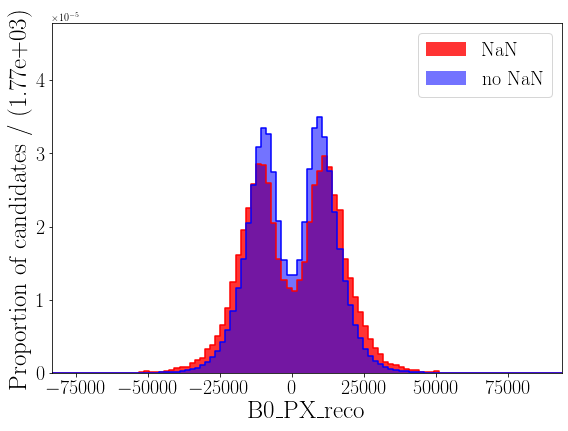

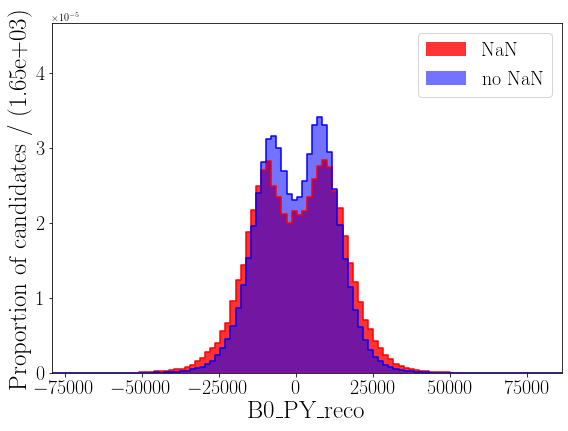

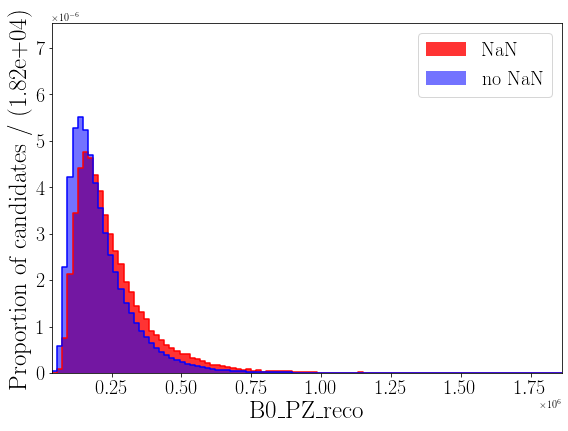

In [108]:
c = 'B0_PX_reco'

plot_hist_var([NaN[c], noNaN[c]], c, data_names=['NaN', 'no NaN'],
             bar_mode=True, alpha=[0.8, 0.55, 0.40])

c = 'B0_PY_reco'
plot_hist_var([NaN[c], noNaN[c]], c, data_names=['NaN', 'no NaN'],
             bar_mode=True, alpha=[0.8, 0.55, 0.40])

c = 'B0_PZ_reco'
plot_hist_var([NaN[c], noNaN[c]], c, data_names=['NaN', 'no NaN'],
             bar_mode=True, alpha=[0.8, 0.55, 0.40])

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//tau_P_reco_NaN_no_NaN


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='tau\\_P\\_reco', ylabel='Proportion of candidates / (3.91e+03)'>)

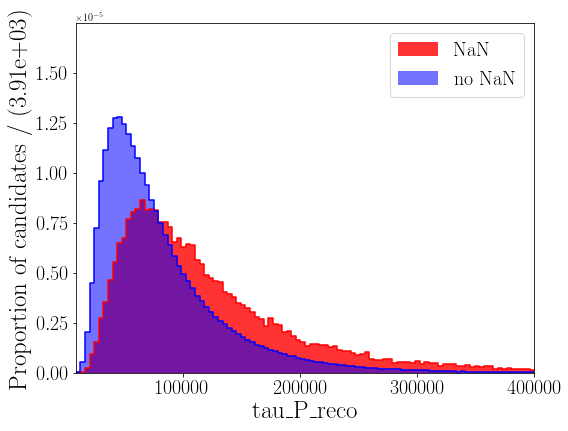

In [94]:
c = 'tau_P_reco'

plot_hist_var([NaN[c], noNaN[c]], c, data_names=['NaN', 'no NaN'],
             bar_mode=True, alpha=[0.8, 0.55, 0.40], high=0.4e6)

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//tau_M_NaN_no_NaN
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//tau_M_NaN_no_NaN


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='tau\\_M', ylabel='Proportion of candidates / (5.5)'>)

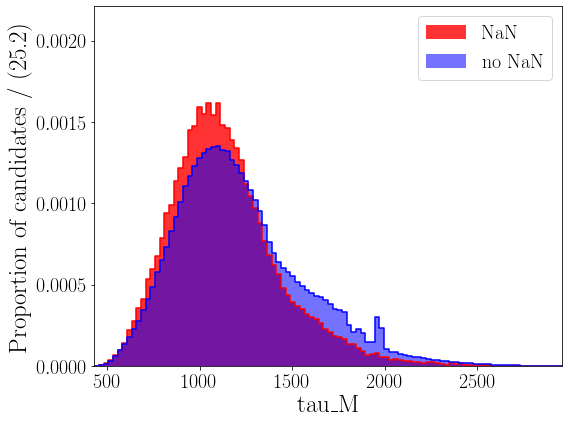

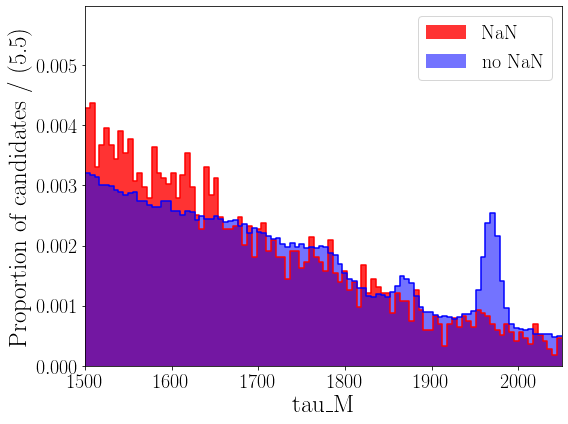

In [69]:
c = 'tau_M'

plot_hist_var([NaN[c], noNaN[c]], c, data_names=['NaN', 'no NaN'],
             bar_mode=True, alpha=[0.8, 0.55, 0.40])
plot_hist_var([NaN[c], noNaN[c]], c, data_names=['NaN', 'no NaN'],
             bar_mode=True, alpha=[0.8, 0.55, 0.40], low=1500, high=2050)

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//m_Kpipi_NaN_no_NaN
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//m_Kpipi_NaN_no_NaN


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='m\\_Kpipi', ylabel='Proportion of candidates / (1.4)'>)

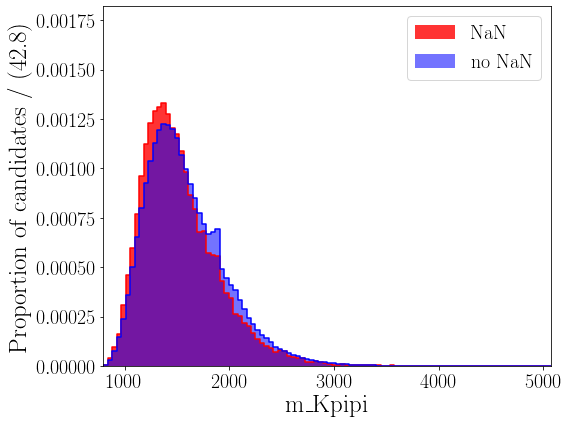

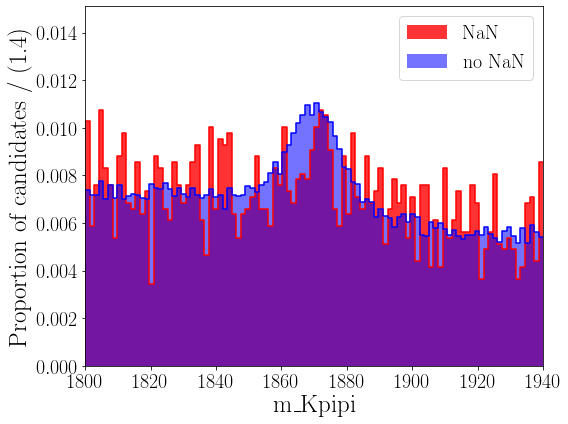

In [79]:
c = 'm_Kpipi'

plot_hist_var([NaN[c], noNaN[c]], c, data_names=['NaN', 'no NaN'],
             bar_mode=True, alpha=[0.8, 0.55, 0.40])

plot_hist_var([NaN[c], noNaN[c]], c, data_names=['NaN', 'no NaN'],
             bar_mode=True, alpha=[0.8, 0.55, 0.40], low=1800, high=1940)

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//tau_P_NaN_no_NaN


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='tau\\_P', ylabel='Proportion of candidates / (2.94e+03)'>)

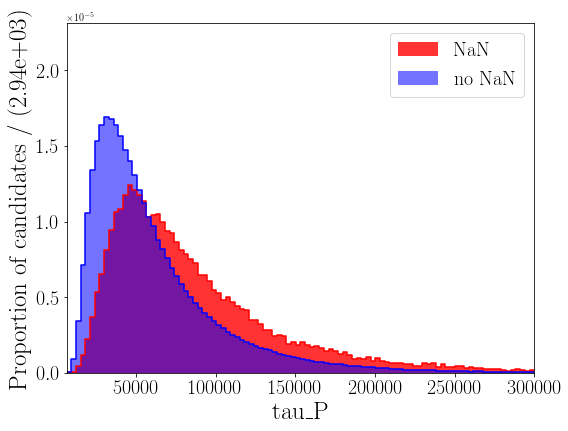

In [81]:
c = 'tau_P'

plot_hist_var([NaN[c], noNaN[c]], c, data_names=['NaN', 'no NaN'],
             bar_mode=True, alpha=[0.8, 0.55, 0.40], high=0.3e6)

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//B0_M_NaN_no_NaN


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='B0\\_M', ylabel='Proportion of candidates / (23.1)'>)

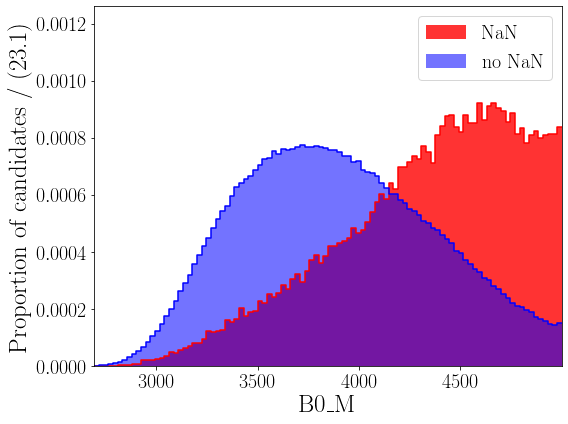

In [82]:
c = 'B0_M'

plot_hist_var([NaN[c], noNaN[c]], c, data_names=['NaN', 'no NaN'],
             bar_mode=True, alpha=[0.8, 0.55, 0.40])

In [ ]:
plot_hist_var([tau_M_NaN, tau_M_noNaN], 'tau_M', data_names=['NaN', 'no NaN'],
             bar_mode=True, alpha=[0.8, 0.55, 0.40])

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//p_NaN_no_NaN_all
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//p_X_NaN_no_NaN_all


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='p\\_X', ylabel='Proportion of candidates / (400)'>)

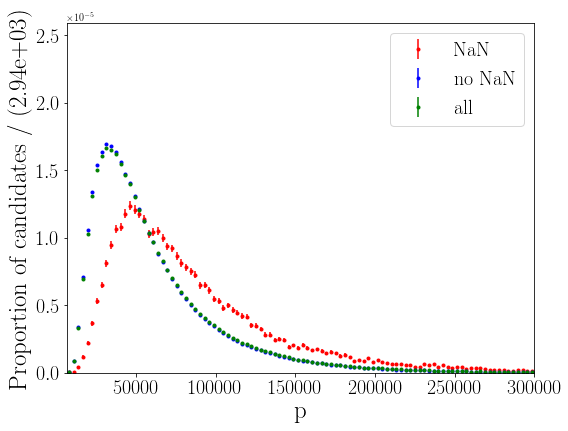

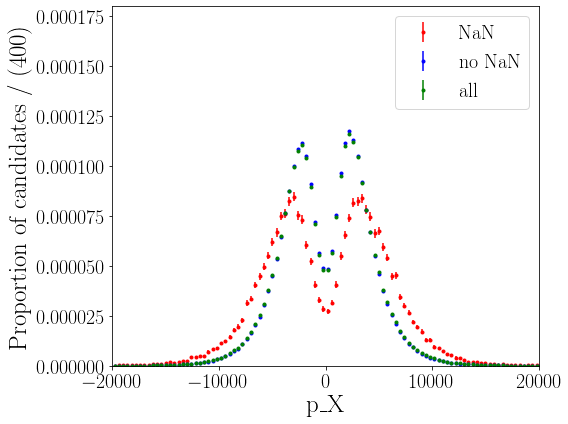

In [41]:
plot_hist_var([p_NaN, p_noNaN, p], 'p', data_names=['NaN', 'no NaN', 'all'], high=0.3e6)
plot_hist_var([pX_NaN, pX_noNaN, pX], 'p_X', data_names=['NaN', 'no NaN', 'all'], low=-20000, high=20000)
# plot_hist_var([pY_NaN, pY_noNaN], 'p_Y', data_names=['NaN', 'no NaN'])
# plot_hist_var([pZ_NaN, pZ_noNaN], 'p_Z', data_names=['NaN', 'no NaN'])

### Read the `MC` and `data` samples

In [16]:
df = {}
df['MC']   = load_dataframe(loc.B2DstDplusX_MC, tree_name='DecayTreeTuple/DecayTree', columns=[branch])
df['data']   = load_dataframe(loc.B2DstDplusX_list, tree_name='DecayTreeTuple/DecayTree', columns=[branch])

Loading /data/lhcb/users/scantlebury-smead/angular_analysis/double_charm/final_ds_selection_B_DstDpX_Kpipi_truth_matched.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_11_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_12_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_15_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_16_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_17_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_18_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_11_down_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_12_down_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_

## Plot

### MC + data

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX/m_Kpipi


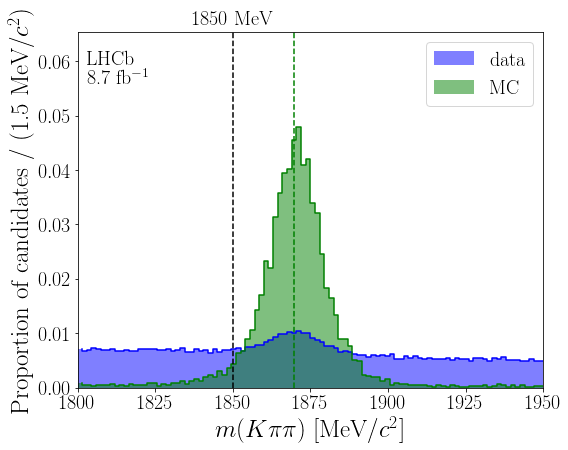

In [17]:
fig, ax = plot_hist_auto({'data': df['data'], 'MC': df['MC']}, branch,
                    folder_name=data_name, bar_mode=True, 
                    colors = ['blue', 'green'],
                    low = low, high=high, save_fig=False,
                        pos_text_LHC={'ha':'left', 'fontsize':20})

draw_vline(ax, 1850, '1850 MeV', ls='--', color='black')

draw_vline(ax, m_Dplus_PDG, '', color='g', ls='--') # $m(D^+)_{PDG}$

save_fig(fig, branch, folder_name=data_name)

### data

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX/m_Kpipi_full


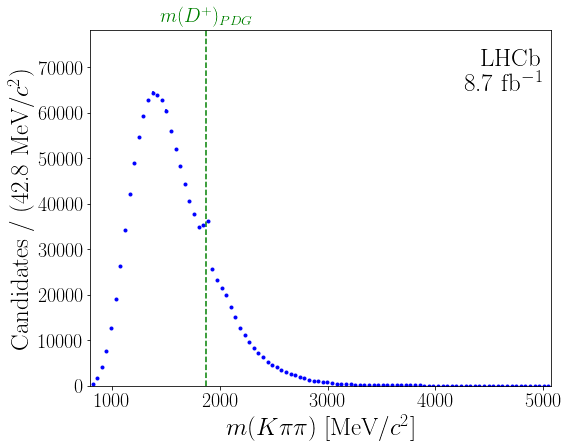

In [18]:
fig, ax = plot_hist_auto({data_name+'_full': df['data']}, branch,
                         folder_name=data_name, bar_mode=False, 
                         save_fig=False, 
                         colors='b', 
                        pos_text_LHC={'ha':'right'})

draw_vline(ax, m_Dplus_PDG, '$m(D^+)_{PDG}$', ls='--', color='g')

save_fig(fig, f'{branch}_full', folder_name=data_name)

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX/m_Kpipi


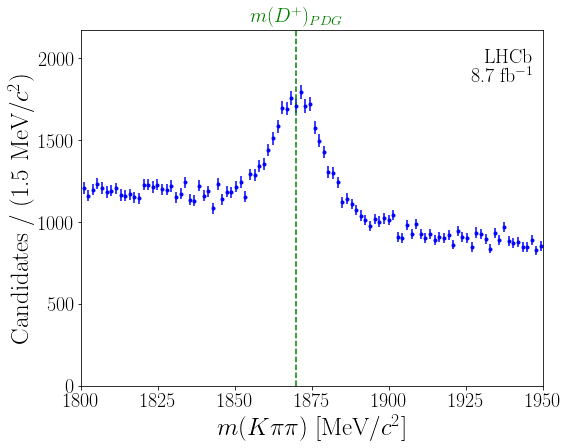

In [19]:
fig, ax = plot_hist_auto({data_name: df['data']}, branch,
                         folder_name=data_name, bar_mode=False, 
                         low=low, high=high, save_fig=False, 
                         colors='b', pos_text_LHC={'ha':'right', 'fontsize': 20})

draw_vline(ax, m_Dplus_PDG, '$m(D^+)_{PDG}$', ls='--', color='g')

save_fig(fig, branch, folder_name=data_name)

We need to fit te $D^+$ peak

## Fit to data
**Goal**: find the $D^+$ component

The `data` is modelled by:
- an exponential background
- A double CB:
    - tail parameters fixed by MC
    - $\sigma$ and $\mu$ floated

In [20]:
df['data'] = df['data'].query(f"{branch} > {low} and {branch} < {high}")

## Retrieve MC fit

In [22]:
MC_params = retrieve_params(MC_name, MC_name)

In [23]:
MC_params

{'alphaL': 0.8771828836422826,
 'alphaL_err': 0.21694988508126364,
 'alphaR': -0.9969234242523797,
 'alphaR_err': 0.1516323042059065,
 'frac': 0.46186247062099023,
 'frac_err': 0.11170936432622444,
 'mu': 1870.4533145928665,
 'mu_err': 0.15372045005222956,
 'nL': 4.923137390594049,
 'nL_err': 2.6678108730128156,
 'nR': 13.475963464901241,
 'nR_err': 13.716393210909386,
 'sigma': 7.737794866248178,
 'sigma_err': 0.2041540196340685}

### Parameters

In [24]:
n_events = len(df['data'].query(f"{branch} > {low} and {branch} < {high}"))

`doubleCB` + `exp`

$n_R$ are fixed from the MC fit

In [25]:
initial_values = {
    'mu': {
        'value' : 1871,
        'low': 1860,
        'high': 1880,     
    },
    'sigma': {
        'value' : 8.,
        'low': 2.,
        'high': 10.,     
    },
    'alphaL': {
        'value' : MC_params['alphaL'],
        'low': 0.1,
        'high': 5.,   
        'floating': False,        
    },
    'alphaR': {
        'value' : MC_params['alphaR'],
        'low': -5.,
        'high': -0.001, 
        'floating': False,
        
    },
    'nL': {
        'value' : MC_params['nL'],
        'low': 0.01,
        'high': 500.,
        'floating': False,
    },
    'nR': {
        'value' : MC_params['nR'],
        'low': 0.01,
        'high': 500.,
        'floating': False,
    },
    'frac': {
        'value' : MC_params['frac'],
        'low': 0.1,
        'high': 1.,     
    },
    'n_bkg': {
        'value' : n_events*2/3,
        'low': 0,
        'high': n_events,  
    },
    'n_sig': {
        'value' : n_events/3,
        'low': 0,
        'high': n_events,  
    },
    'lambda': {
        'value' : -0.01,
        'low': -0.1,
        'high': -0.0000001  
    }
}


In [26]:
obs = zfit.Space("x", limits=(low, high))
num += 1
zparams = HEA.fit.fit.define_zparams(initial_values, num=num)

### PDFs

In [27]:
model_S, crystalBallL_S, crystalBallR_S = sum_crystalball_or_gaussian(zparams['mu'], zparams['mu'],
                                                                      zparams['sigma'], zparams['sigma'],
                                                                      zparams['frac'], obs,                                                          
                                                                      zparams['alphaL'], zparams['alphaR'], 
                                                                      zparams['nL'], zparams['nR']
                                                                     )

exponential = zfit.pdf.Exponential(zparams["lambda"], obs=obs)

model_S_ext = model_S.create_extended(zparams["n_sig"])
exp_ext = exponential.create_extended(zparams["n_bkg"])
model = zfit.pdf.SumPDF([model_S_ext, exp_ext])

data = zfit.Data.from_pandas(df['data'][branch],obs=obs)

### fit

In [28]:
result, params = HEA.fit.fit.launch_fit(model, data, extended=True)
result, params = HEA.fit.fit.launch_fit(model, data, extended=True)
result, params = HEA.fit.fit.launch_fit(model, data, extended=True)

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -6.471e+05                 │        Nfcn = 350 (350 total)        │
│ EDM = 0.000256 (Goal: 0.001)     │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
Time to do the fit:  4.452803782187402
name         value    minuit_hesse    at limit
--------  --------  --------------  ----------
n_sig;1      11440     +/-   3e+02       False
n_bkg;1     103000     +/- 4.3e+02       False
frac;1      0

In [29]:
assert HEA.fit.fit.check_fit(result)

### Plot the result

In [30]:
bin_width = 2
n_bins = int(round(high - low)/bin_width)
print(n_bins)

75


//home/correiaa/bd2dsttaunu/HEA/HEA/plot/fit.py:780: UserWarning: The function <function Space.limits at 0x7f8dadcca7a0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[1800.]]), array([[1950.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])


Number of bins: 75
Width of the bins: 2.0

Number of d.o.f. in the model:  6
Reduced chi2:  1.5402756411040721

Mean of the normalised residuals: -0.01838304741280982
Std of the normalised residuals: 1.190258649783132
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX/m_Kpipi_fit


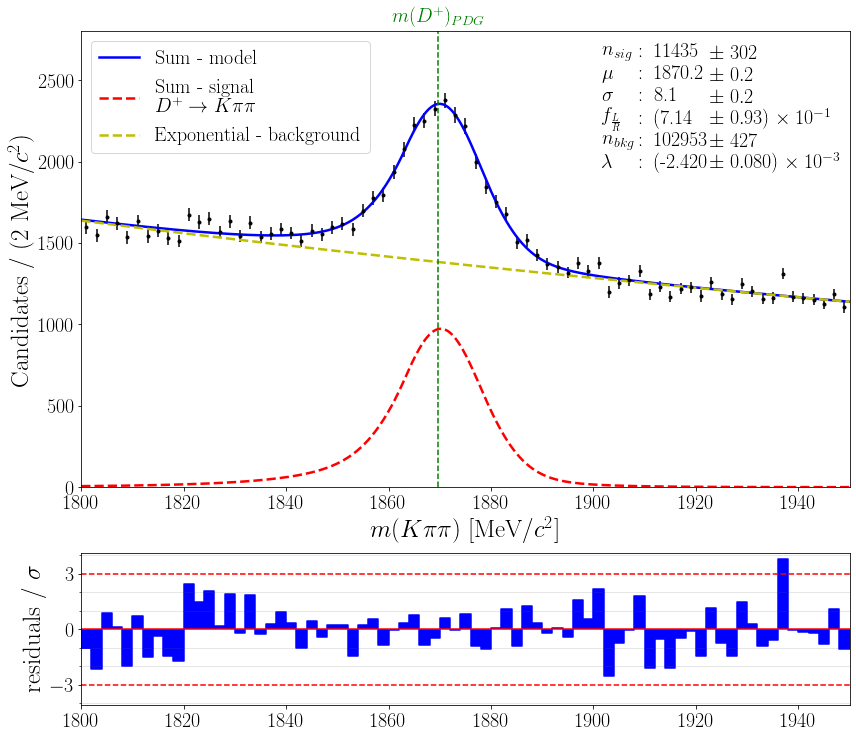

In [31]:
fig, ax, _ = plot_hist_fit_auto(df['data'], branch, 
                             models = [model, model_S_ext, exp_ext], 
                             models_names = ["", f'\n {latex_decay}',''], 
                             colors = ['b','r','y'], n_bins=n_bins,
                             obs=obs, data_name=data_name, 
                             params=params, latex_params=latex_params, 
                             fontsize_leg=20., save_fig=False,
                                fontsize_res=20, colWidths=[0.035, 0.01, 0.04, 0.12],
                            )

draw_vline(ax, m_Dplus_PDG, '$m(D^+)_{PDG}$', ls='--', color='g')


save_fig(fig, 'm_Kpipi_fit', folder_name=data_name)

Number of bins: 75
Width of the bins: 2.0

Number of d.o.f. in the model:  6
Reduced chi2:  1.5402756411040721

Mean of the normalised residuals: -0.01838304741280982
Std of the normalised residuals: 1.190258649783132
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX/m_Kpipi_fit


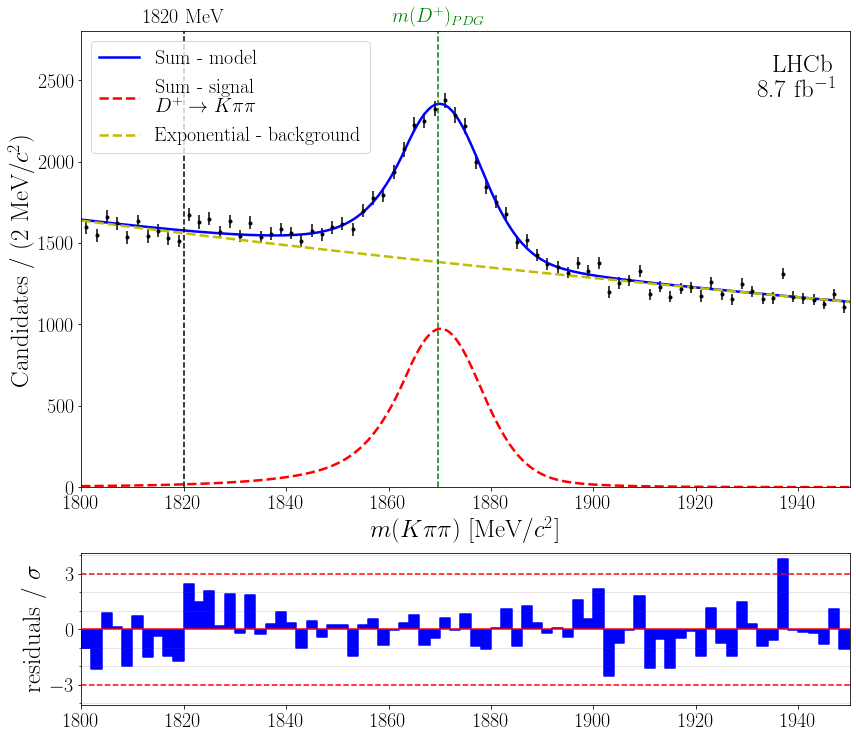

In [32]:
fig, ax, _ = plot_hist_fit_auto(df['data'], branch, 
                                models = [model, model_S_ext, exp_ext],
                                models_names = ["", f'\n {latex_decay}',''], 
                                colors = ['b','r','y'], n_bins=n_bins,
                                obs=obs, data_name=data_name,
                                fontsize_leg=20., save_fig=False,
                                pos_text_LHC={'ha':'right'},
                            )

draw_vline(ax, m_Dplus_PDG, '$m(D^+)_{PDG}$', ls='--', color='g')
draw_vline(ax, 1820, '1820 MeV', ls='--', color='black')


save_fig(fig, 'm_Kpipi_fit', folder_name=data_name)

The black dashed horizontal line represents the low limit of the reduced data, chosen in order not to take into account a possible background component.

### Save the fit results

In [33]:
HEA.fit.fit.save_params(params, data_name, True, folder_name=data_name, remove=f';{num}')

Json file saved in /home/correiaa/bd2dsttaunu/output/json/BTODstDX/BTODstDX_params.json


In [34]:
HEA.fit.params.json_to_latex_table(data_name, data_name, latex_params)

Latex table in /home/correiaa/bd2dsttaunu/output/tables/BTODstDX/BTODstDX_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$n_{sig}$&$11435\pm302$\\
\hline
$\mu$&$1870.2\pm0.2$\\
\hline
$\sigma$&$8.1\pm0.2$\\
\hline
$f_{\frac{L}{R}}$&$(7.14\pm0.93)\times 10^{-1}$\\
\hline
$n_{bkg}$&$102953\pm427$\\
\hline
$\lambda$&$(-2.420\pm0.080)\times 10^{-3}$\\
\hline
\end{tabular}


## Compute the $_s$Weights associated with the $D^+$ peak

# NOT USED (I use the $_s$Weights of the reduced data!)

In [247]:
from HEA import RVariable
import HEA.plot.tools as pt
import matplotlib.pyplot as plt
from HEA.pandas_root import save_root

### Computation

In [248]:
weights = compute_sweights(model, data)

In [249]:
weight = {}
weight['sig'] = weights[zparams['n_sig']]
weight['bkg'] = weights[zparams['n_bkg']]

mass = df['data'][branch]

### Representation of the  $_s$Weights

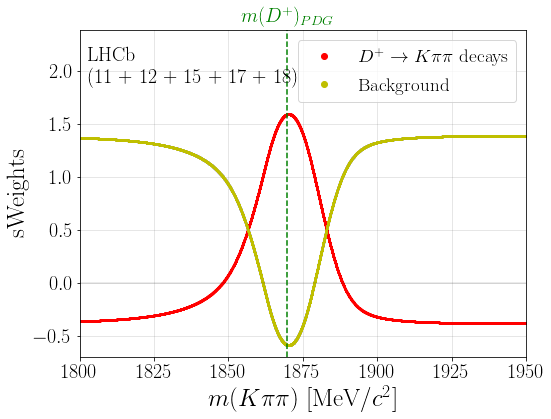

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstDX/sWeights


In [250]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(mass, weight['sig'] ,'.', label=f'{latex_decay} decays', markersize=1., color='r')
ax.plot(mass, weight['bkg'] ,'.', label='Background', markersize=1., color='y')
ax.set_xlim(low, high)

latex_branch, unit = RVariable.get_latex_branch_unit_from_branch(branch)
pt.set_label_branch(ax, latex_branch, unit)

plt.ylabel('sWeights',fontsize=25)

ymin, ymax = ax.get_ylim()
pt.fix_plot(ax, factor_ymax=1.4, pos_text_LHC={'text':description, 'ha':'left', 'fontsize':20}, ymin_to_0=False)

ax.axhline(0, c='black', ls='-', alpha=0.1)
draw_vline(ax, m_Dplus_PDG, '$m(D^+)_{PDG}$', ls='--', color='g')

ax.legend(markerscale=12, fontsize=19)
pt.show_grid(ax)
plt.show()
plt.close()

save_fig(fig, 'sWeights', folder_name=data_name)

## Save the $_s$Weights

In [251]:
df['data']['sWeight'] = weight['sig']
df['data']['sWeight_bkg'] = weight['bkg']

In [252]:
df['data'].columns

Index(['m_Kpipi', 'sWeight', 'sWeight_bkg'], dtype='object')

In [253]:
save_root(df['data'], data_name + '_with_sWeights', 'DecayTree', folder_name=data_name)

Root file saved in /home/correiaa/bd2dsttaunu/output/root/BTODstDX/BTODstDX_with_sWeights.root
